In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./College.csv")

In [4]:
df.keys()

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
df = pd.read_csv("./College.csv", index_col = 0)

In [8]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


/Users/techsim/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


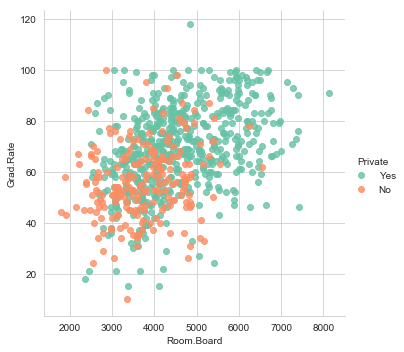

In [16]:
sns.set_style("whitegrid")
sns.lmplot("Room.Board", "Grad.Rate",  
          data = df, hue = "Private", 
          palette="Set2", fit_reg=False,
           size=5)
plt.show()

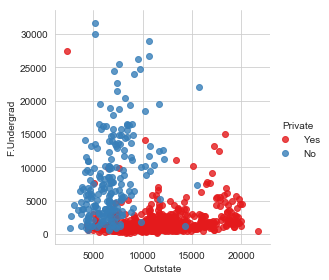

In [18]:
sns.lmplot("Outstate", "F.Undergrad",
          data = df, hue = "Private", palette="Set1", 
          fit_reg=False, size=4)
plt.show()

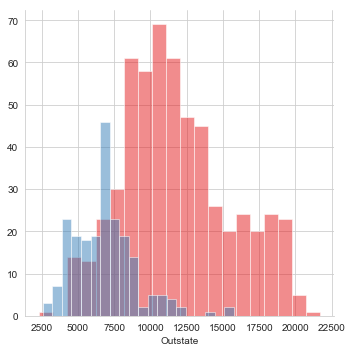

In [22]:
g = sns.FacetGrid(df, hue = "Private", palette="Set1", size=5)
g.map(plt.hist, "Outstate", bins = 20, alpha = 0.5)
plt.show()

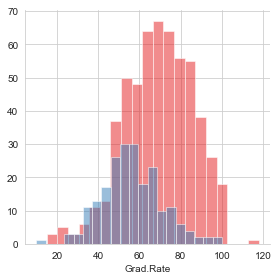

In [26]:
g =sns.FacetGrid(df, hue="Private",
                palette="Set1", size=4)
g.map(plt.hist, "Grad.Rate", bins = 20, alpha = 0.5)
plt.show()

In [27]:
df[df["Grad.Rate"]>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [31]:
df["Grad.Rate"]["Cazenovia College"] = 100

/Users/techsim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


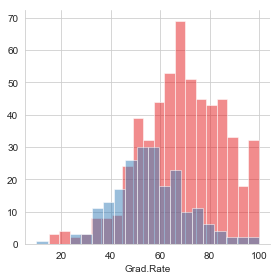

In [32]:
g =sns.FacetGrid(df, hue="Private",
                palette="Set1", size=4)
g.map(plt.hist, "Grad.Rate", bins = 20, alpha = 0.5)
plt.show()

In [34]:
new_df = df.drop("Private", axis=1)

from sklearn.cluster import KMeans

In [37]:
KM = KMeans(n_clusters=2)
KM.fit(new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
def Converter(cluster):
    if cluster == "Yes":
        return 1
    else:
        return 0

In [40]:
df["Cluster"]  = df["Private"].apply(Converter)

In [42]:
df["Cluster"].value_counts()

1    565
0    212
Name: Cluster, dtype: int64

In [43]:
pred = KM.labels_

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [49]:
cm = confusion_matrix(df["Cluster"], pred)

In [50]:
cm

array([[138,  74],
       [531,  34]])

In [51]:
accuracy_score(df["Cluster"], pred)

0.22136422136422138